In [2]:
import networkx as nx

from src.traffic.v3.environment import TrafficModel
from src.traffic.v3.util.network import build_network, create_cars, \
    create_sioux_falls_network, create_sioux_falls_cars

In [3]:
network_path = 'data/SiouxFalls_net.tntp'
costs_path = 'data/sf1_c.txt'
cars_path = 'data/sf1_dem.txt'

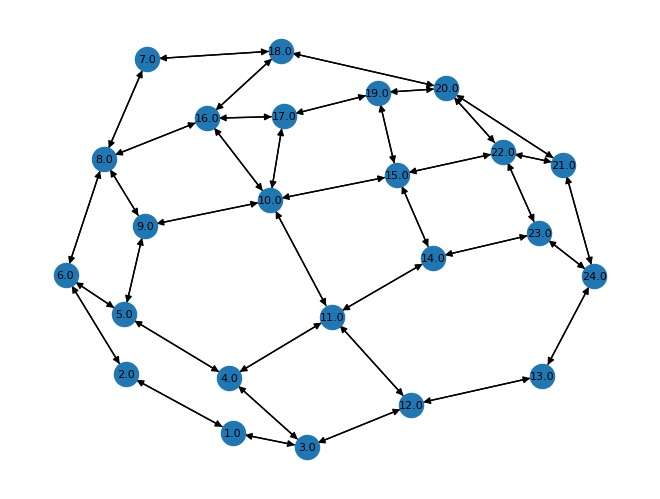

In [5]:
network = create_sioux_falls_network(network_path, costs_path)

nx.draw(network,
        with_labels=True,
        font_size=8,
        edgelist=[(v, w) for v, w in network.edges if v != w])

In [ ]:
cars = create_sioux_falls_cars(cars_path, network)
cars

In [7]:
len(cars)

3600

In [24]:
number_of_steps = 40000

model = TrafficModel(network, cars)
model.set_edge_restriction((1, 2), allowed=False)
model.cars = create_sioux_falls_cars(cars_path, model.allowed_network)
step_stats_unrestricted, car_stats_unrestricted = model.run_sequentially(number_of_steps, show_progress=True)

100%|██████████| 40000/40000 [4:09:02<00:00,  2.68it/s]    


<Axes: xlabel='step'>

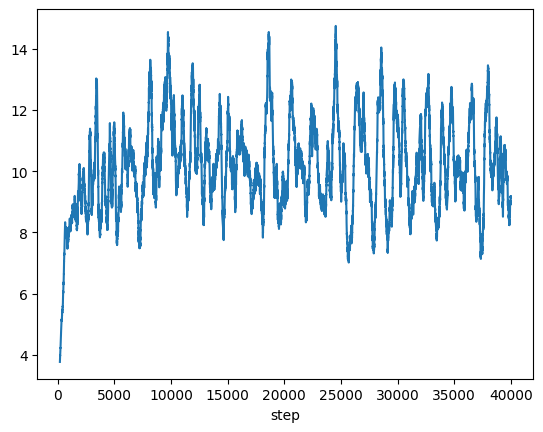

In [25]:
car_stats_unrestricted.groupby('step')['travel_time'].mean().rolling(window=200).mean().plot()

In [22]:
car_stats_unrestricted.groupby(['source', 'target'])['travel_time'].mean()

source  target
1       2           6.011726
        3           1.128357
        4           2.417767
        5           3.615204
        6           4.813769
                     ...    
24      19         67.543919
        20        309.214844
        21          1.060021
        22         60.785339
        23          1.046630
Name: travel_time, Length: 528, dtype: float64

In [ ]:
car_stats_unrestricted.groupby(['source', 'target'])['car_id'].count()

In [18]:
car_stats_unrestricted

,step,car_id,value_of_time,value_of_money,source,target,route,travel_time,toll,total_cost
0,0,1,1,1,9,10,"(9, 10)",-9999,0.0,-9999.0
1,0,14,1,1,16,8,"(16, 8)",-9999,0.0,-9999.0
2,0,29,1,1,8,16,"(18.0, 16)",-9997,0.0,-9997.0
3,0,34,1,1,15,19,"(15, 19)",-9999,0.0,-9999.0
4,0,53,1,1,9,10,"(9, 10)",-9999,0.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...
3699191,9999,3525,1,1,24,14,"(24, 23.0, 14)",2,0.0,2.0
3699192,9999,3528,1,1,21,14,"(21, 24.0, 23.0, 14)",5,0.0,5.0
3699193,9999,3568,1,1,12,13,"(12, 13)",1,0.0,1.0
3699194,9999,3573,1,1,15,14,"(15, 14)",1,0.0,1.0
